In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df = pd.read_csv("./arkansas_chr/2023-Table 1.csv")

In [196]:
#remove for sure non-used columns
cols_95_to_drop = [col for col in df.columns if '95%' in col]
cols_unreliable_to_drop = [col for col in df.columns if 'Unreliable' in col]
cols_to_drop = cols_95_to_drop + cols_unreliable_to_drop
#rate_cols = [col for col in df.columns if 'Rate' in col]
#percent_cols = [col for col in df.columns if '%' in col]
df_cleaned = df.drop(cols_to_drop, axis=1)
df_cleaned = df_cleaned[df_cleaned['County'].notna()]

In [144]:
df.shape, df_cleaned.shape

((76, 531), (75, 284))

In [145]:
df_cleaned.columns

Index(['FIPS', 'State', 'County', 'Deaths',
       'Years of Potential Life Lost Rate', 'Z-Score', 'YPLL Rate (AIAN)',
       'YPLL Rate (Asian)', 'YPLL Rate (Black)', 'YPLL Rate (Hispanic)',
       ...
       '% Native Hawaiian or Other Pacific Islander', '# Hispanic',
       '% Hispanic', '# Non-Hispanic White', '% Non-Hispanic White',
       '# Not Proficient in English', '% Not Proficient in English',
       '% Female', '# Rural Residents', '% Rural'],
      dtype='object', length=284)

In [146]:
columns_of_interest = ['FIPS', 'Child Mortality Rate']
percent_cols = [col for col in df_cleaned.columns if '%' in col]
columns_of_interest = columns_of_interest + percent_cols
df_selected = df_cleaned[columns_of_interest]
df_selected = df_selected.dropna(subset=['Child Mortality Rate'])
df_selected.columns

Index(['FIPS', 'Child Mortality Rate', '% Fair or Poor Health',
       '% Low Birthweight', '% LBW (AIAN)', '% LBW (Asian)', '% LBW (Black)',
       '% LBW (Hispanic)', '% LBW (White)',
       '% Adults Reporting Currently Smoking', '% Adults with Obesity',
       '% Physically Inactive', '% With Access to Exercise Opportunities',
       '% Excessive Drinking', '% Driving Deaths with Alcohol Involvement',
       '% Uninsured', '% with Annual Mammogram', '% Screened (AIAN)',
       '% Screened (Asian)', '% Screened (Black)', '% Screened (Hispanic)',
       '% Screened (White)', '% Vaccinated', '% Vaccinated (AIAN)',
       '% Vaccinated (Asian)', '% Vaccinated (Black)',
       '% Vaccinated (Hispanic)', '% Vaccinated (White)',
       '% Completed High School', '% Some College', '% Unemployed',
       '% Children in Poverty', '% Children in Poverty (AIAN)',
       '% Children in Poverty (Asian)', '% Children in Poverty (Black)',
       '% Children in Poverty (Hispanic)', '% Children in P

In [147]:
#check missing values
#[col, count for col in df_cleaned.columns if df_selected.isna().sum() > 0]
#nan_counts = df_selected.describe().loc['count']
nan_counts = df_selected.count().rename_axis('Feature').reset_index(name='Count')
with open('nan_counts.txt', 'w') as f:
    f.write(nan_counts.to_string())
#columns with very low counts or missing delete them by reviewing file
drop_aian_columns = [col for col in df_cleaned.columns if 'AIAN' in col]
drop_asian_columns = [col for col in df_cleaned.columns if 'Asian' in col]
drop_hispanic_columns = [col for col in df_cleaned.columns if 'Hispanic' in col]
drop_nan_columns = ['% LBW (AIAN)', '% LBW (Asian)', '% LBW (Hispanic)', '% Screened (AIAN)', '% Screened (Asian)', 
                    '% Vaccinated (AIAN)', '% Vaccinated (Asian)', '% Vaccinated (Hispanic)', '% Children in Poverty (AIAN)',
                    '% Children in Poverty (Asian)', '% Drive Alone (AIAN)', '% Drive Alone (Asian)']
#remove driving related columns and to begin with race not black]

In [148]:
df_selected = df_selected.drop(drop_nan_columns, axis=1)

In [149]:
df_selected.describe()

,FIPS,Child Mortality Rate,% Fair or Poor Health,% Low Birthweight,% LBW (Black),% LBW (White),% Adults Reporting Currently Smoking,% Adults with Obesity,% Physically Inactive,% With Access to Exercise Opportunities,...,% 65 and Over,% Black,% American Indian or Alaska Native,% Asian,% Native Hawaiian or Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
count,51.000000,51.000000,51.000000,51.000000,36.000000,40.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,5070.137255,79.745098,20.666667,9.156863,14.750000,7.825000,22.666667,39.196078,31.509804,54.627451,...,18.625490,16.256863,1.049020,1.103922,0.270588,7.107843,72.741176,1.333333,50.490196,55.223529
std,43.152298,24.208960,2.833137,1.911780,2.272506,0.873763,2.169485,3.778992,3.208567,15.477675,...,3.017472,17.666434,0.693216,0.969528,0.550743,6.308529,16.967548,1.872610,1.357535,19.183676
min,5001.000000,45.000000,15.000000,6.000000,9.000000,5.000000,16.000000,30.000000,24.000000,9.000000,...,12.300000,0.500000,0.400000,0.200000,0.000000,1.800000,34.300000,0.000000,44.000000,12.300000
25%,5034.000000,62.000000,19.000000,8.000000,14.000000,7.000000,22.000000,36.500000,29.000000,44.000000,...,16.800000,1.900000,0.600000,0.500000,0.100000,3.150000,61.400000,0.000000,50.100000,40.750000
50%,5065.000000,74.000000,21.000000,9.000000,15.000000,8.000000,23.000000,39.000000,31.000000,57.000000,...,18.300000,8.600000,0.800000,0.800000,0.100000,4.500000,76.100000,1.000000,50.600000,55.800000
75%,5109.000000,97.500000,23.000000,10.000000,16.000000,8.000000,24.000000,41.000000,34.000000,65.000000,...,20.200000,26.200000,1.300000,1.200000,0.150000,7.000000,87.150000,1.500000,51.200000,68.550000
max,5149.000000,142.000000,29.000000,14.000000,20.000000,9.000000,27.000000,48.000000,39.000000,85.000000,...,27.100000,61.500000,3.800000,4.700000,2.900000,34.700000,94.400000,10.000000,52.800000,100.000000


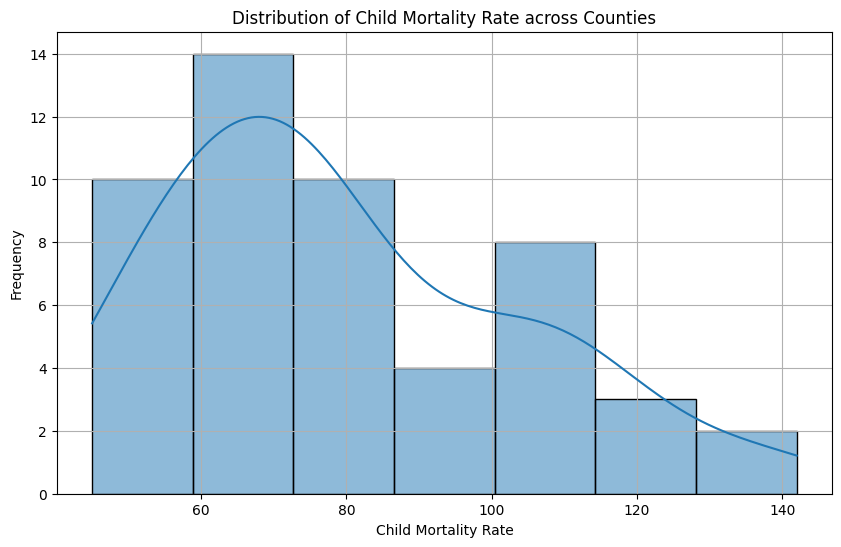

In [150]:
plt.figure(figsize=(10, 6))
sns.histplot(df_selected['Child Mortality Rate'], kde=True)
plt.title('Distribution of Child Mortality Rate across Counties')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

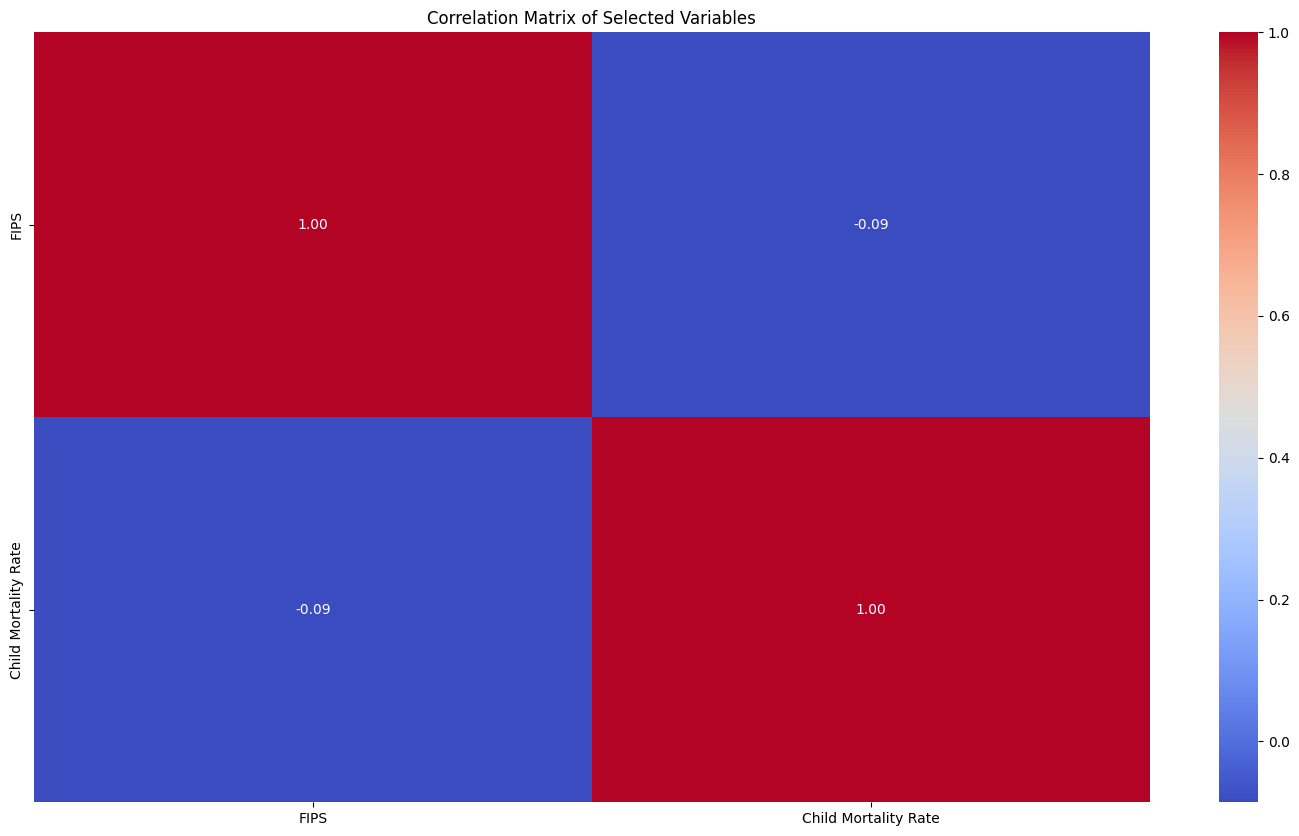

In [151]:
#county and child mortality rates lol higher FIPS code brings in Washington, pulaski etc.. kinda saying those are better for reduced
#child mortality rates
columns_correlation = ['FIPS', 'Child Mortality Rate']
df_correlation = df_selected[columns_correlation]
correlation_matrix = df_correlation.corr()

# Visualize the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

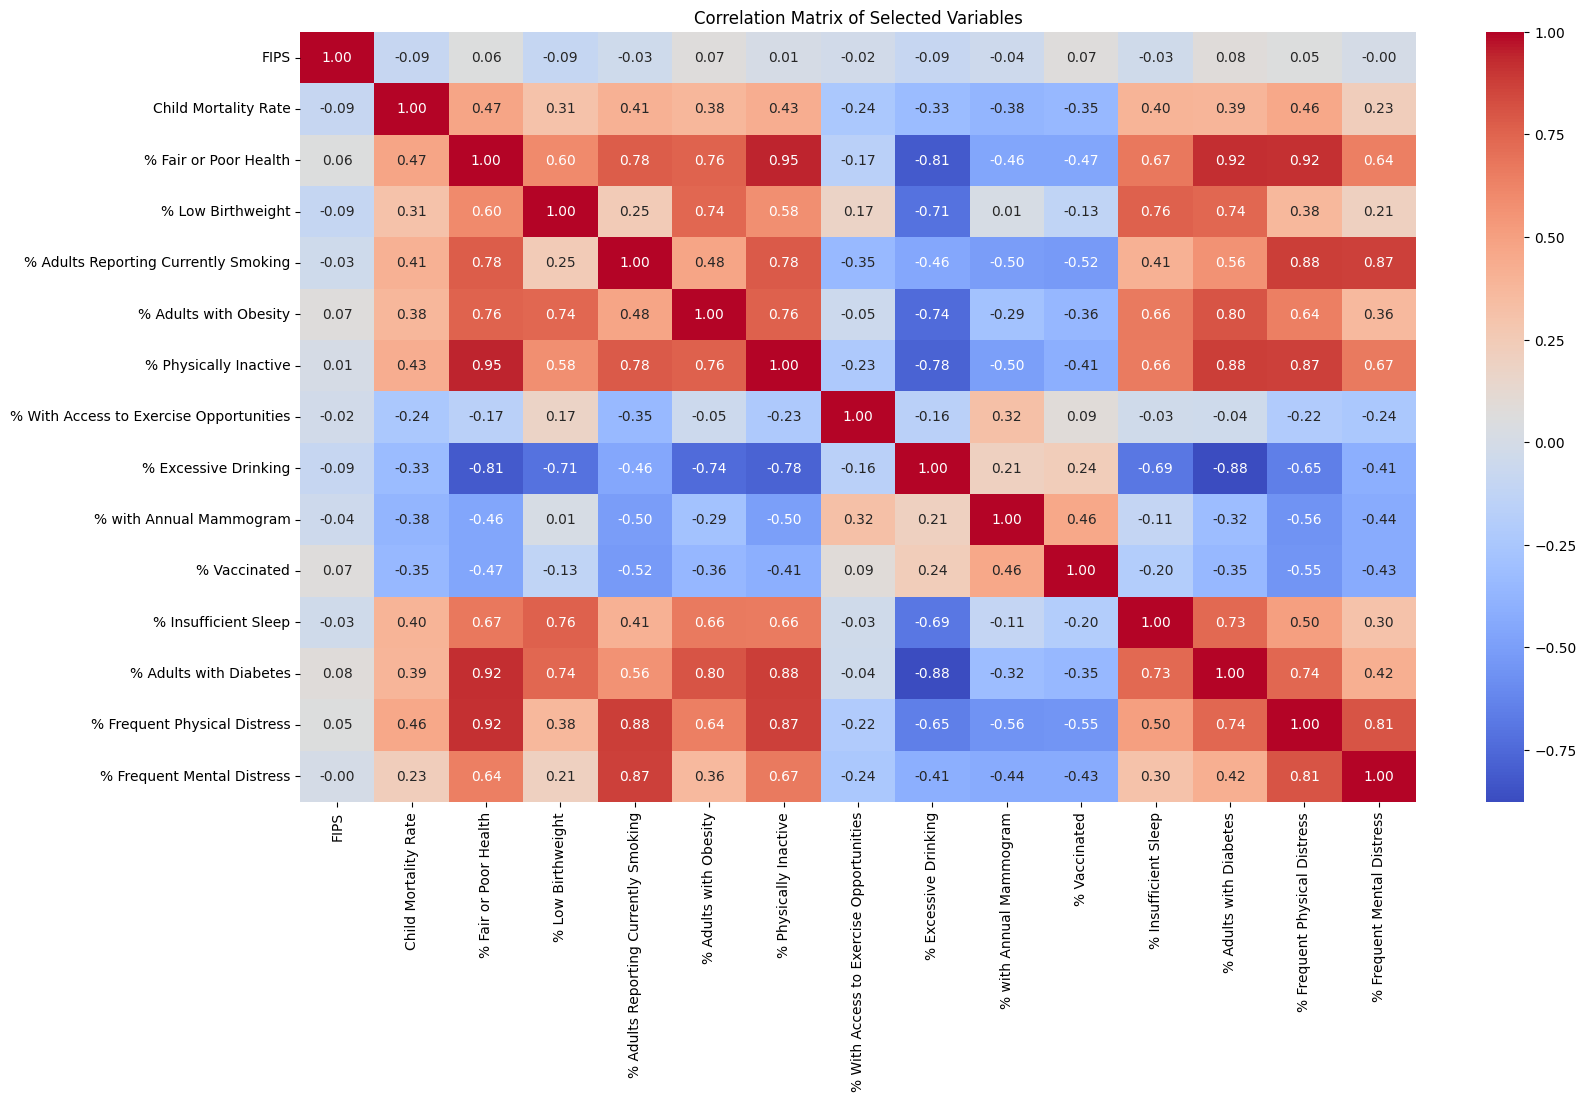

In [152]:
# correlation matrix for full data and health behaviors
columns_correlation = ['FIPS', 'Child Mortality Rate', '% Fair or Poor Health', '% Low Birthweight', 
                                 '% Adults Reporting Currently Smoking', '% Adults with Obesity', '% Physically Inactive',
                                 '% With Access to Exercise Opportunities', '% Excessive Drinking', '% with Annual Mammogram',
                                 '% Vaccinated', '% Insufficient Sleep', '% Adults with Diabetes', '% Frequent Physical Distress',
                      '% Frequent Mental Distress']
df_correlation = df_selected[columns_correlation]
correlation_matrix = df_correlation.corr()

# Visualize the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

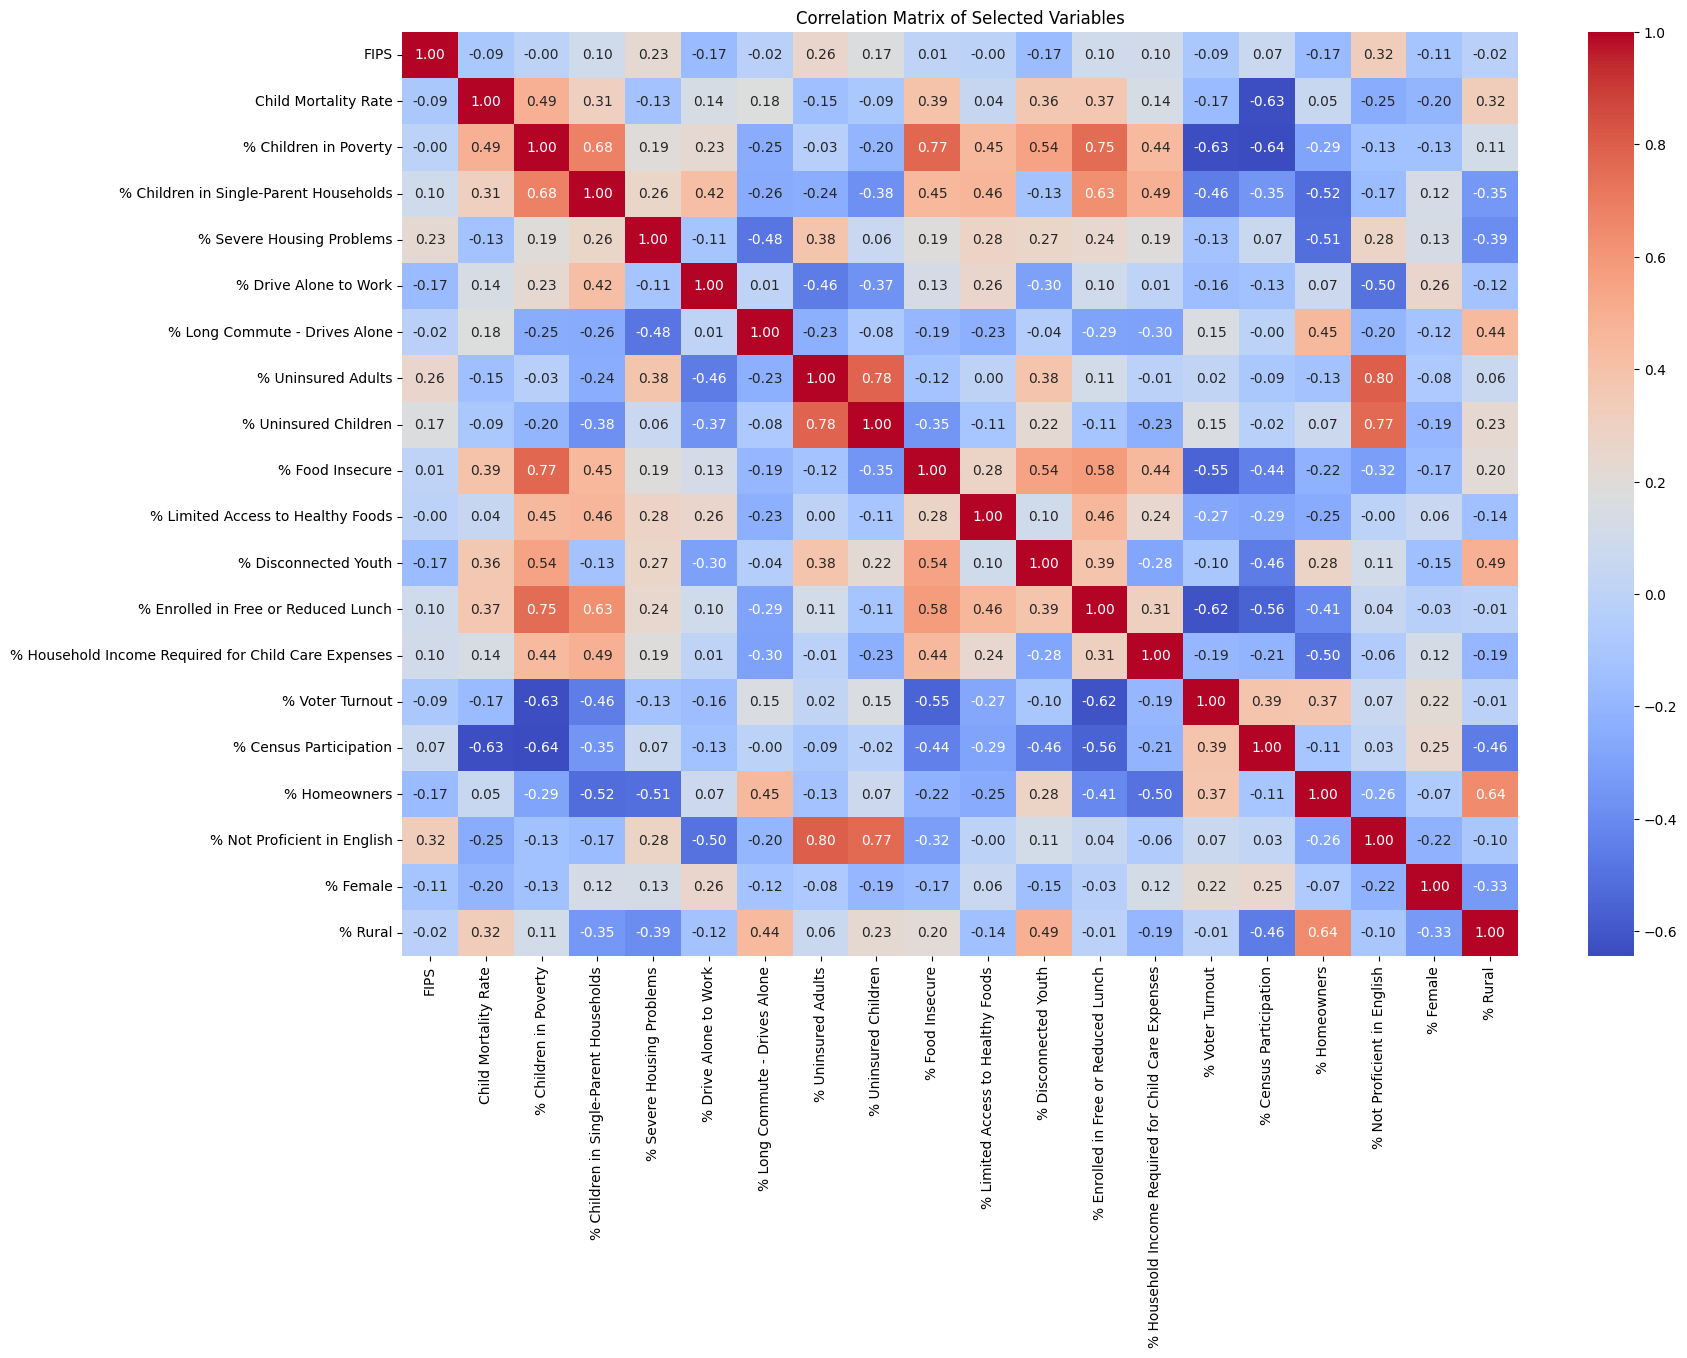

In [153]:
# correlation matrix for full data and socio-economics
columns_correlation = ['FIPS', 'Child Mortality Rate', '% Children in Poverty', '% Children in Single-Parent Households', 
                                 '% Severe Housing Problems', '% Drive Alone to Work', '% Long Commute - Drives Alone',
                                 '% Uninsured Adults', '% Uninsured Children', '% Food Insecure',
                                 '% Limited Access to Healthy Foods', '% Disconnected Youth', '% Enrolled in Free or Reduced Lunch',
                      '% Household Income Required for Child Care Expenses', '% Voter Turnout', '% Census Participation',
                      '% Homeowners', '% Not Proficient in English', '% Female', '% Rural']
df_correlation = df_selected[columns_correlation]
correlation_matrix = df_correlation.corr()

# Visualize the correlation matrix
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

In [154]:
columns_of_interest = ['FIPS', 'Child Mortality Rate', 'Child Mortality Rate (Black)', 'Child Mortality Rate (White)']
percent_cols = [col for col in df_cleaned.columns if '%' in col]
columns_of_interest = columns_of_interest + percent_cols
df_selected_race = df_cleaned[columns_of_interest]
df_selected_race = df_selected_race.dropna(subset=['Child Mortality Rate'])
#df_selected_race['Child Mortality Rate (Black)']

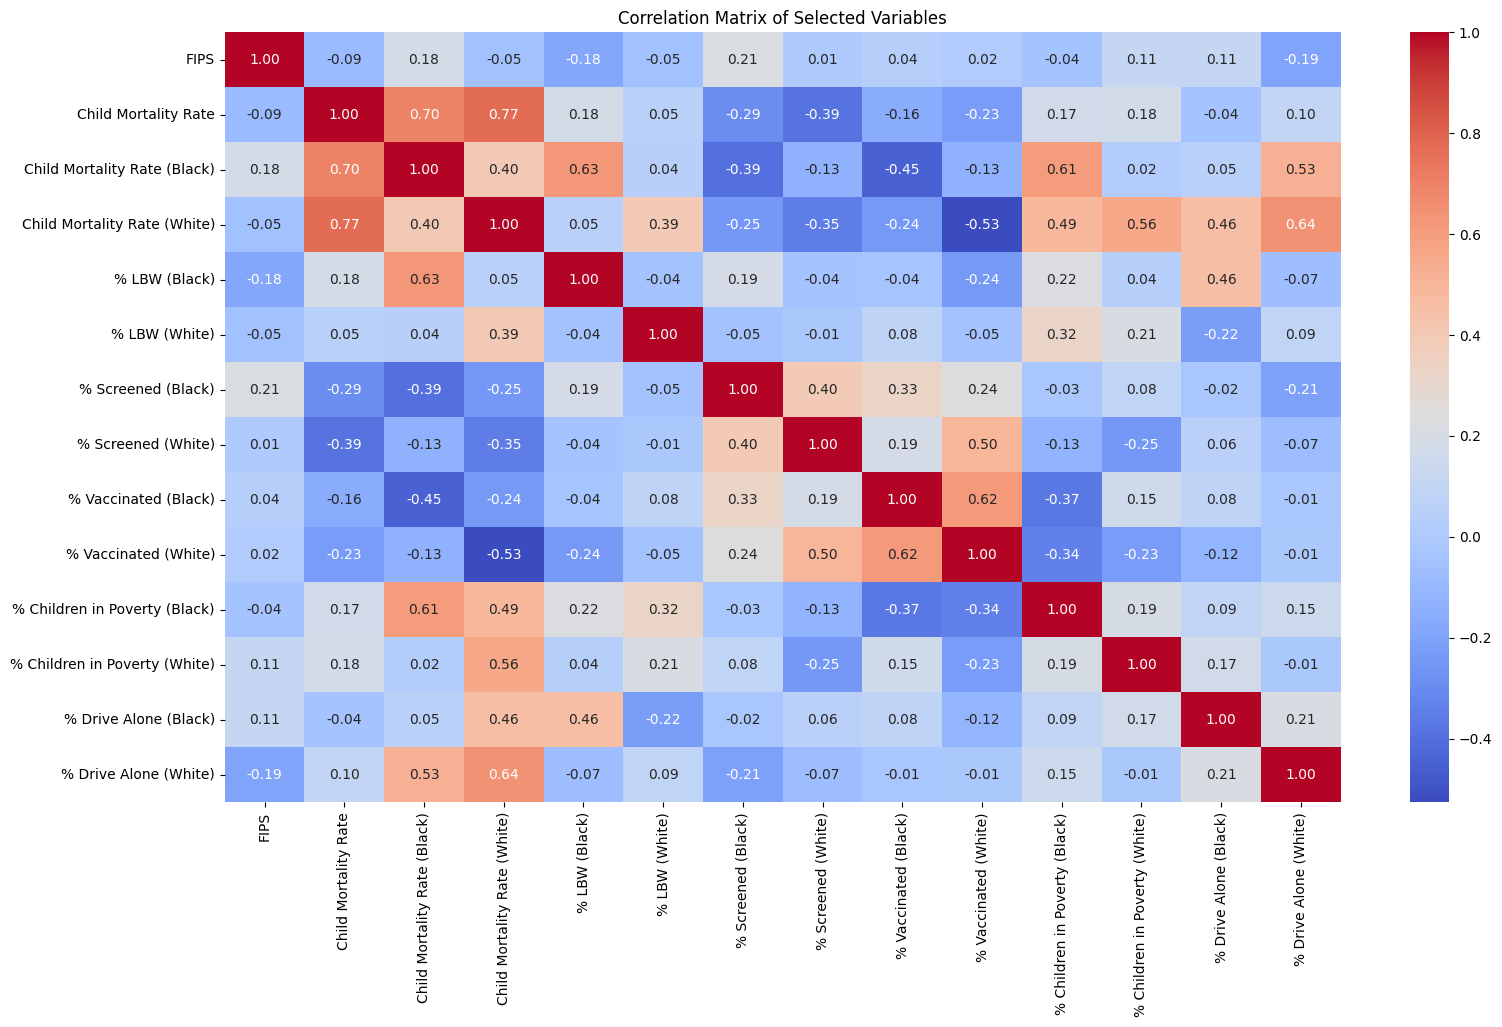

In [155]:
#we will repeat the above parameters but focus on black white races, hispanic, asian and aian are limited data so excluding them for now
# correlation matrix for race data and health / social behaviors
columns_correlation = ['FIPS', 'Child Mortality Rate', 'Child Mortality Rate (Black)', 'Child Mortality Rate (White)',
                       '% LBW (Black)', '% LBW (White)',
                                 '% Screened (Black)', '% Screened (White)', '% Vaccinated (Black)', '% Vaccinated (White)',
                                 '% Children in Poverty (Black)', '% Children in Poverty (White)', '% Drive Alone (Black)',
                                 '% Drive Alone (White)']
df_correlation = df_selected_race[columns_correlation]
correlation_matrix = df_correlation.corr()

# Visualize the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

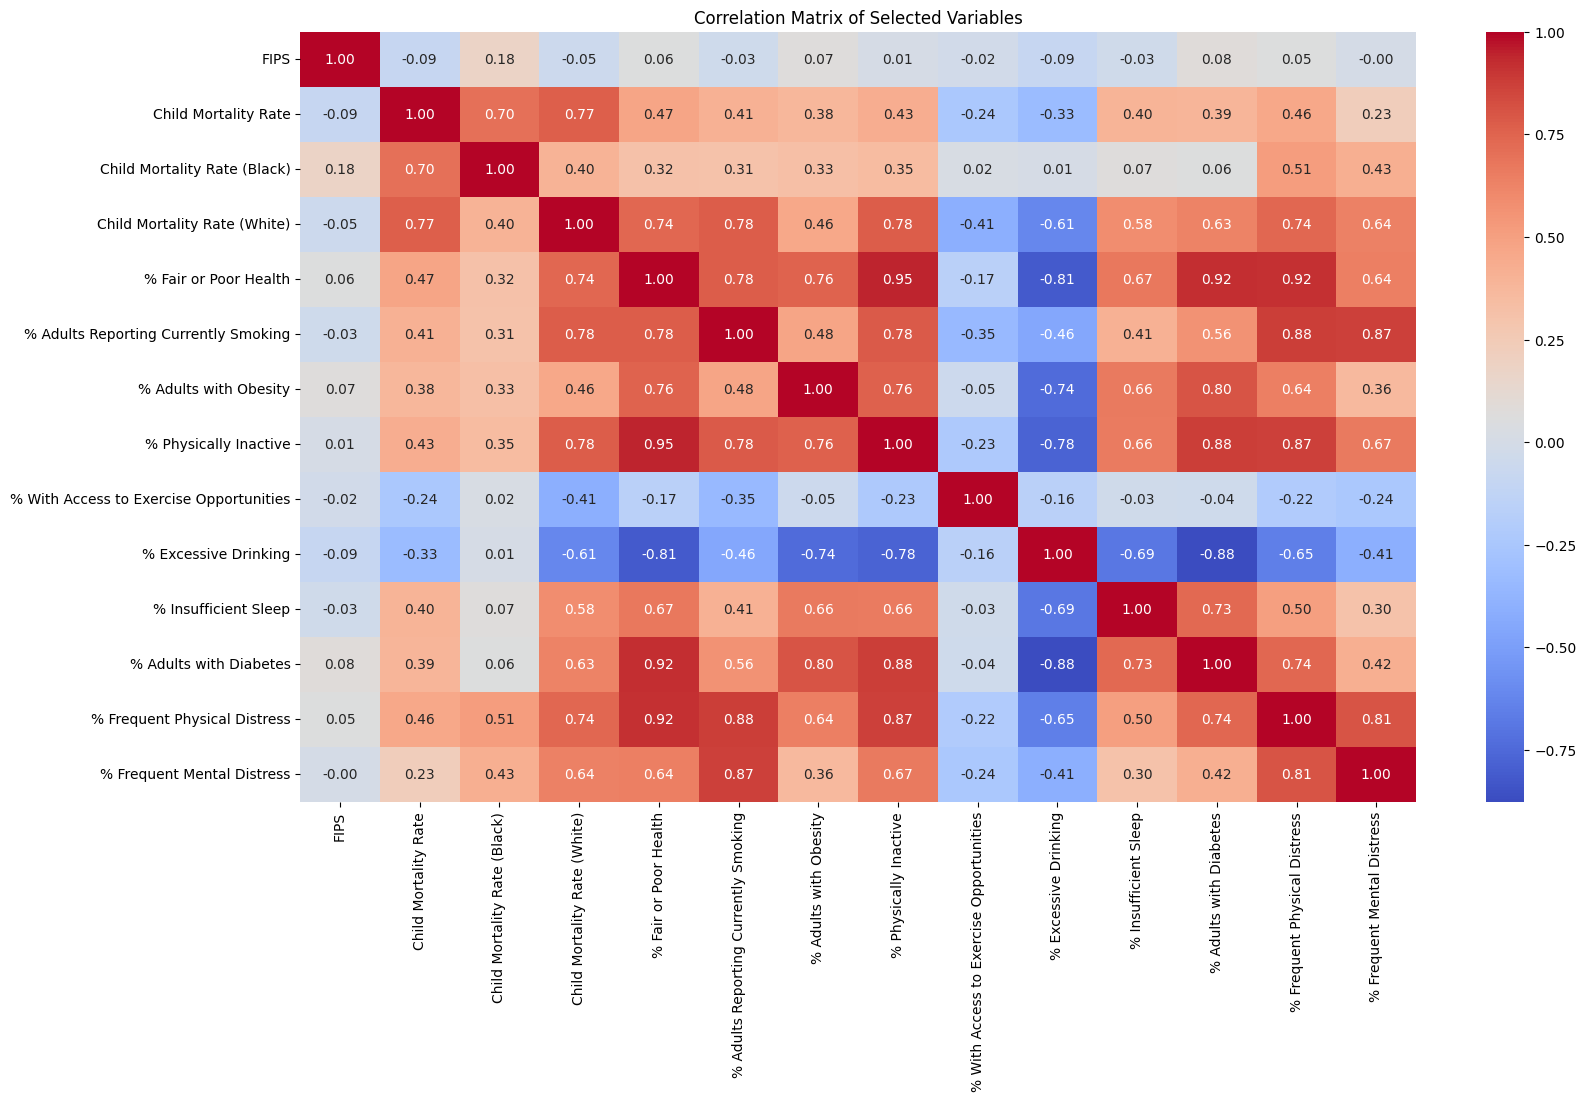

In [156]:
# correlation matrix including race mortality and overall health behaviors
#Race data available and looked into earlier '% Low Birthweight', '% with Annual Mammogram','% Vaccinated', 
columns_correlation = ['FIPS', 'Child Mortality Rate', 'Child Mortality Rate (Black)', 'Child Mortality Rate (White)',
                       '% Fair or Poor Health', 
                                 '% Adults Reporting Currently Smoking', '% Adults with Obesity', '% Physically Inactive',
                                 '% With Access to Exercise Opportunities', '% Excessive Drinking', 
                                 '% Insufficient Sleep', '% Adults with Diabetes', '% Frequent Physical Distress',
                      '% Frequent Mental Distress']
df_correlation = df_selected_race[columns_correlation]
correlation_matrix = df_correlation.corr()

# Visualize the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

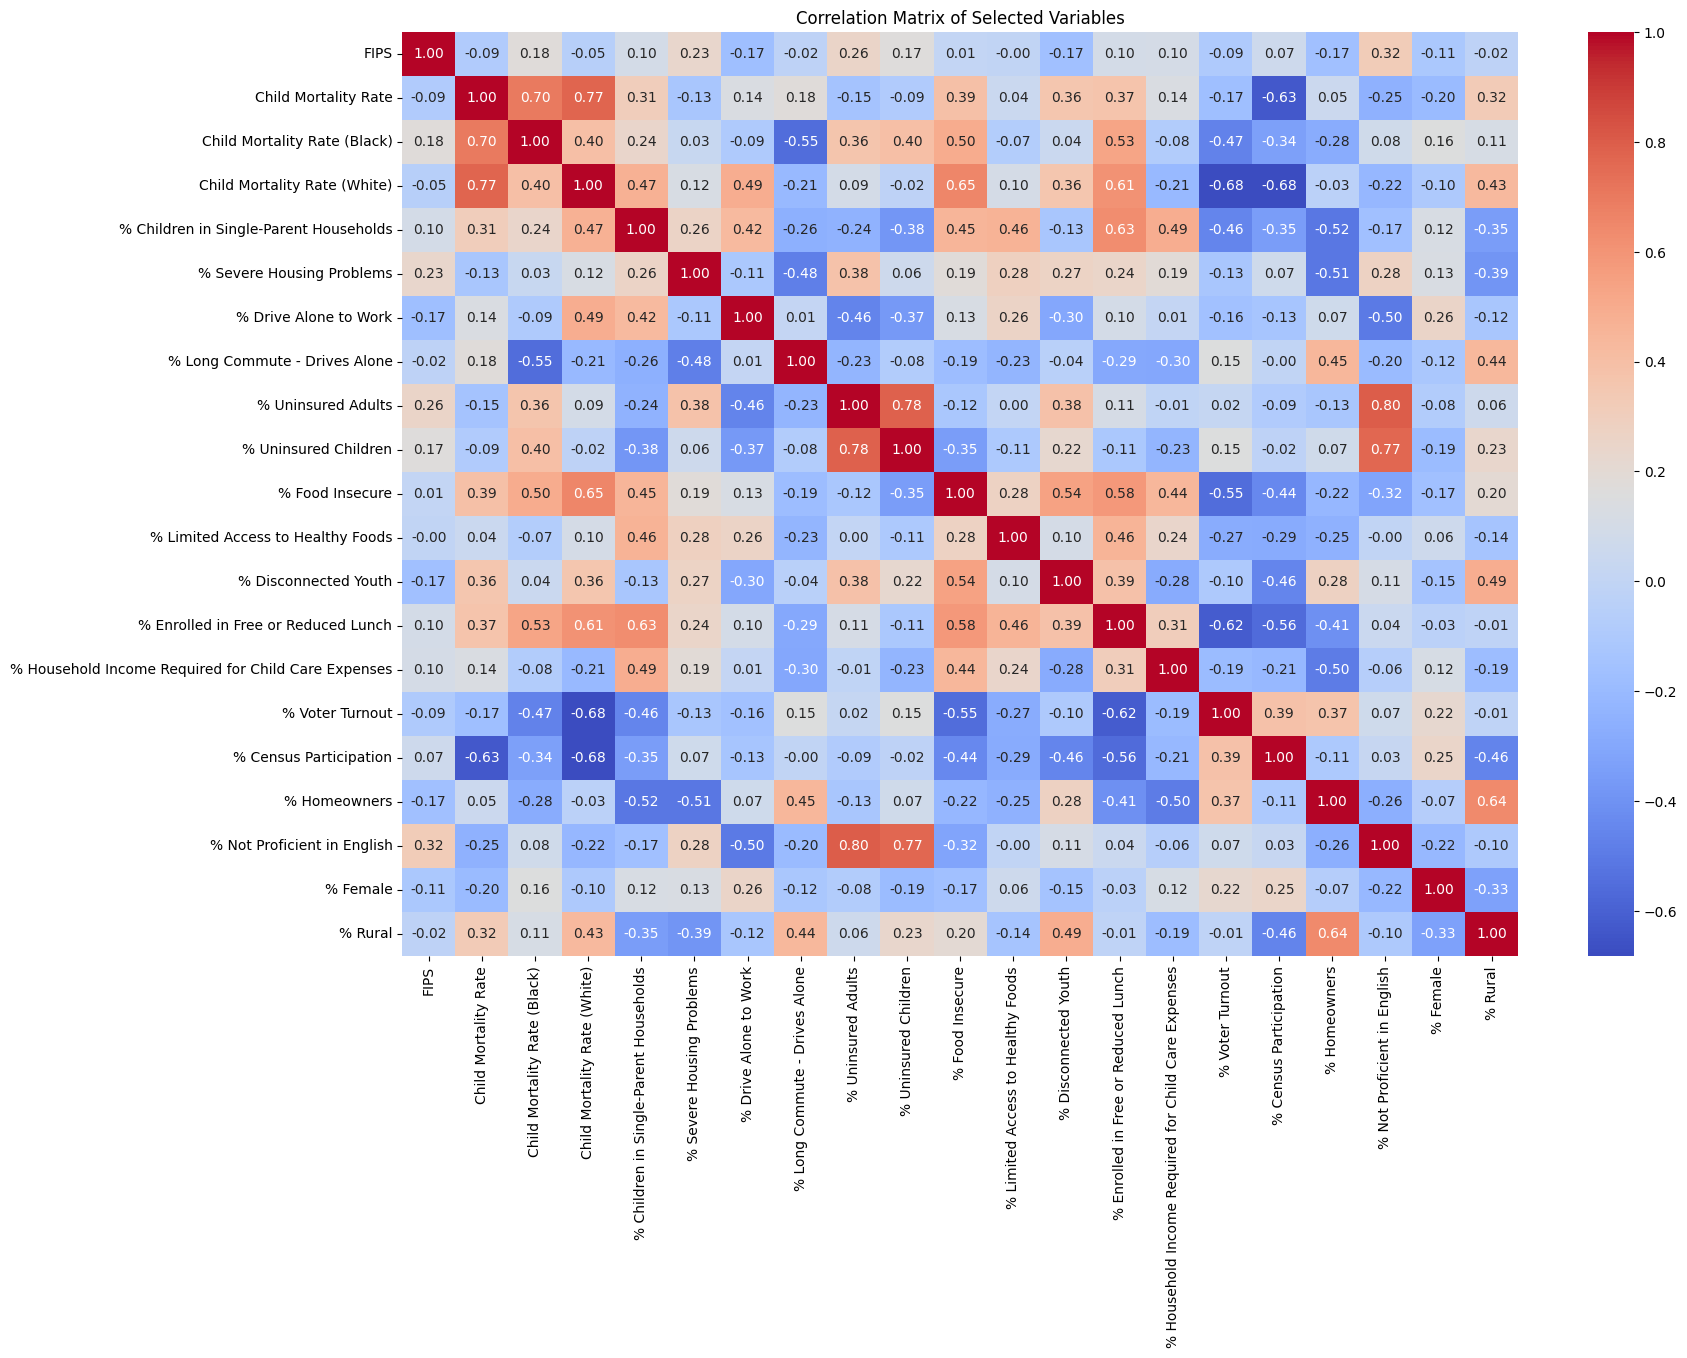

In [157]:
# correlation matrix for overall data driven by race and socio-economics
columns_correlation = ['FIPS', 'Child Mortality Rate', 'Child Mortality Rate (Black)', 'Child Mortality Rate (White)',
                       '% Children in Single-Parent Households',
                                 '% Severe Housing Problems', '% Drive Alone to Work', '% Long Commute - Drives Alone',
                                 '% Uninsured Adults', '% Uninsured Children', '% Food Insecure',
                                 '% Limited Access to Healthy Foods', '% Disconnected Youth', '% Enrolled in Free or Reduced Lunch',
                      '% Household Income Required for Child Care Expenses', '% Voter Turnout', '% Census Participation',
                      '% Homeowners', '% Not Proficient in English', '% Female', '% Rural']
df_correlation = df_selected_race[columns_correlation]
correlation_matrix = df_correlation.corr()

# Visualize the correlation matrix
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

In [158]:
#placeholder for scatter plots, etc..

In [159]:
#remove for sure non-used columns
rate_cols = [col for col in df.columns if 'Rate' in col]
columns_of_interest = ['FIPS']
#percent_cols = [col for col in df_cleaned.columns if '%' in col]
columns_of_interest = columns_of_interest + rate_cols
df_cleaned_rate = df[columns_of_interest]

cols_95_to_drop = [col for col in df_cleaned_rate.columns if '95%' in col]
cols_unreliable_to_drop = [col for col in df_cleaned_rate.columns if 'Unreliable' in col]
cols_to_drop = cols_95_to_drop + cols_unreliable_to_drop
df_cleaned_rate = df_cleaned_rate.drop(cols_to_drop, axis=1)
df_selected_rate = df_cleaned_rate.dropna(subset=['Child Mortality Rate'])

In [160]:
rate_nan_counts = df_selected_rate.count().rename_axis('Feature').reset_index(name='Count')
with open('nan_counts.txt', 'w') as f:
    f.write(rate_nan_counts.to_string())
drop_aian = [col for col in df_selected_rate.columns if 'AIAN' in col]
drop_asian = [col for col in df_selected_rate.columns if 'Asian' in col]
drop_hispanic = [col for col in df_selected_rate.columns if 'Hispanic' in col]
cols_to_drop = drop_aian + drop_asian + drop_hispanic
df_selected_rate = df_selected_rate.drop(cols_to_drop, axis=1)

In [161]:
df_selected_rate.columns

Index(['FIPS', 'Years of Potential Life Lost Rate', 'YPLL Rate (Black)',
       'YPLL Rate (White)', 'Chlamydia Rate', 'Teen Birth Rate',
       'Teen Birth Rate (Black)', 'Teen Birth Rate (White)',
       'Primary Care Physicians Rate', 'Dentist Rate',
       'Mental Health Provider Rate', 'Preventable Hospitalization Rate',
       'Preventable Hosp. Rate (Black)', 'Preventable Hosp. Rate (White)',
       'Social Association Rate', 'Injury Death Rate',
       'Injury Death Rate (Black)', 'Injury Death Rate (White)',
       'Age-Adjusted Death Rate', 'Child Mortality Rate',
       'Child Mortality Rate (Black)', 'Child Mortality Rate (White)',
       'Infant Mortality Rate', 'Infant Mortality Rate (Black)',
       'Infant Mortality Rate (White)', 'HIV Prevalence Rate',
       'Drug Overdose Mortality Rate', 'Drug Overdose Mortality Rate (Black)',
       'Drug Overdose Mortality Rate (White)',
       'Other Primary Care Provider Rate', 'High School Graduation Rate',
       'Homicide Rat

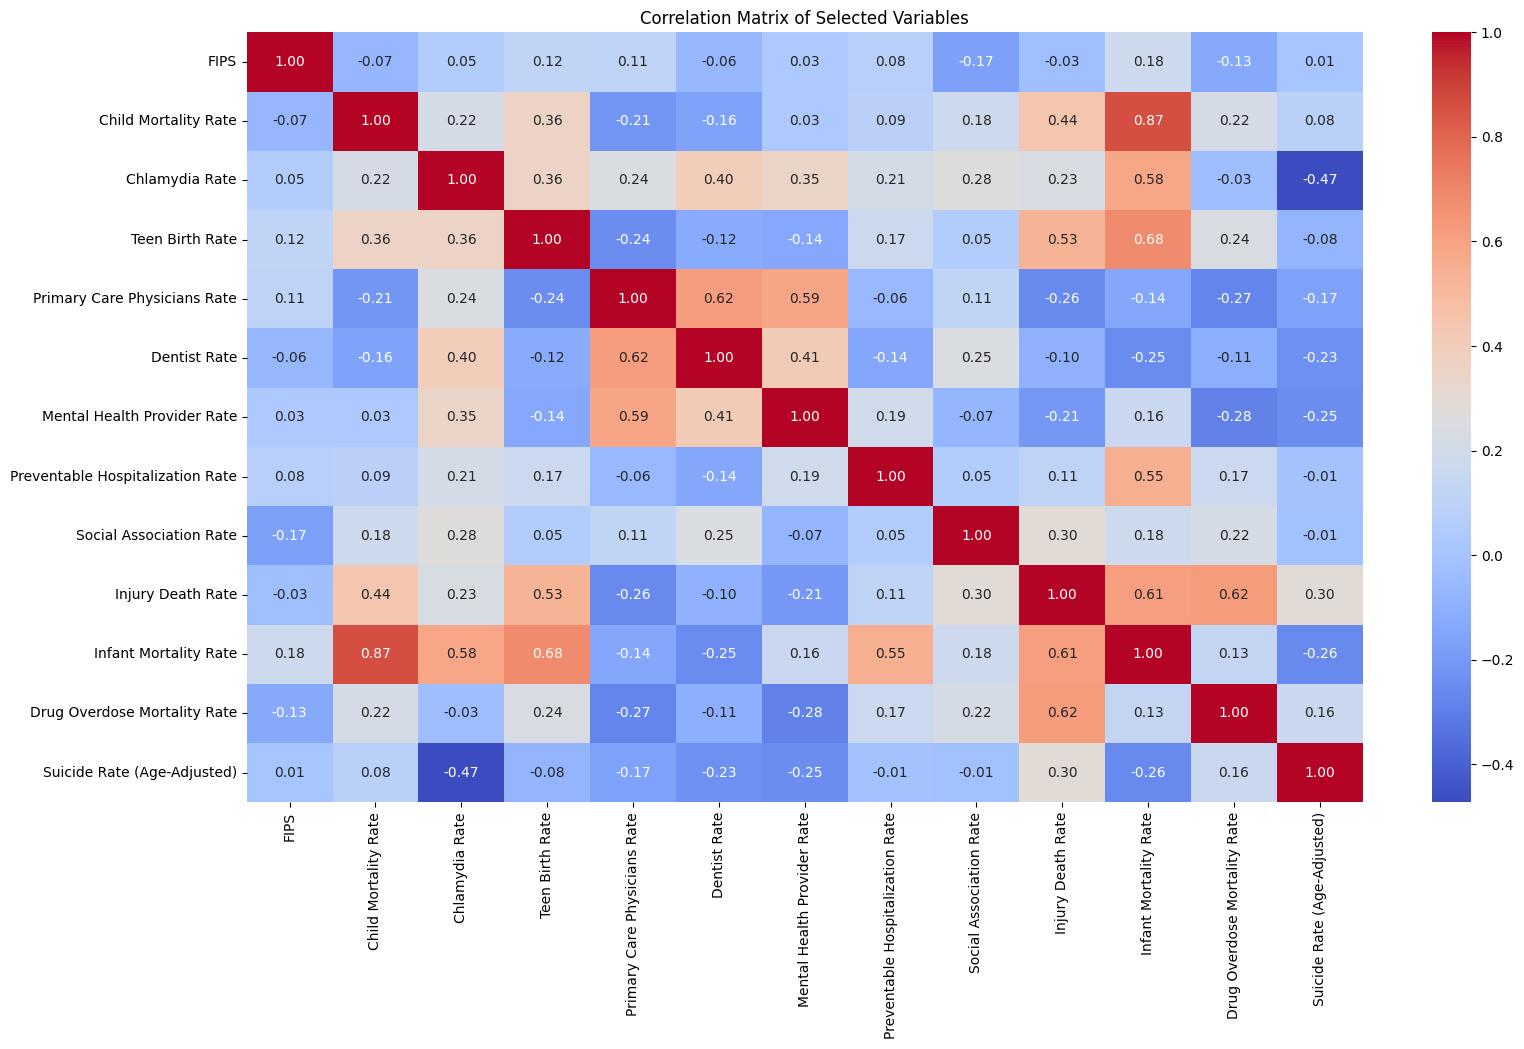

In [162]:
# correlation matrix for full data and health behaviors
columns_correlation = ['FIPS', 'Child Mortality Rate', 'Chlamydia Rate', 
                                 'Teen Birth Rate', 'Primary Care Physicians Rate', 'Dentist Rate',
                                 'Mental Health Provider Rate', 'Preventable Hospitalization Rate', 'Social Association Rate',
                                 'Injury Death Rate', 'Infant Mortality Rate', 'Drug Overdose Mortality Rate',
                      'Suicide Rate (Age-Adjusted)']
df_correlation = df_selected_rate[columns_correlation]
correlation_matrix = df_correlation.corr()

# Visualize the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

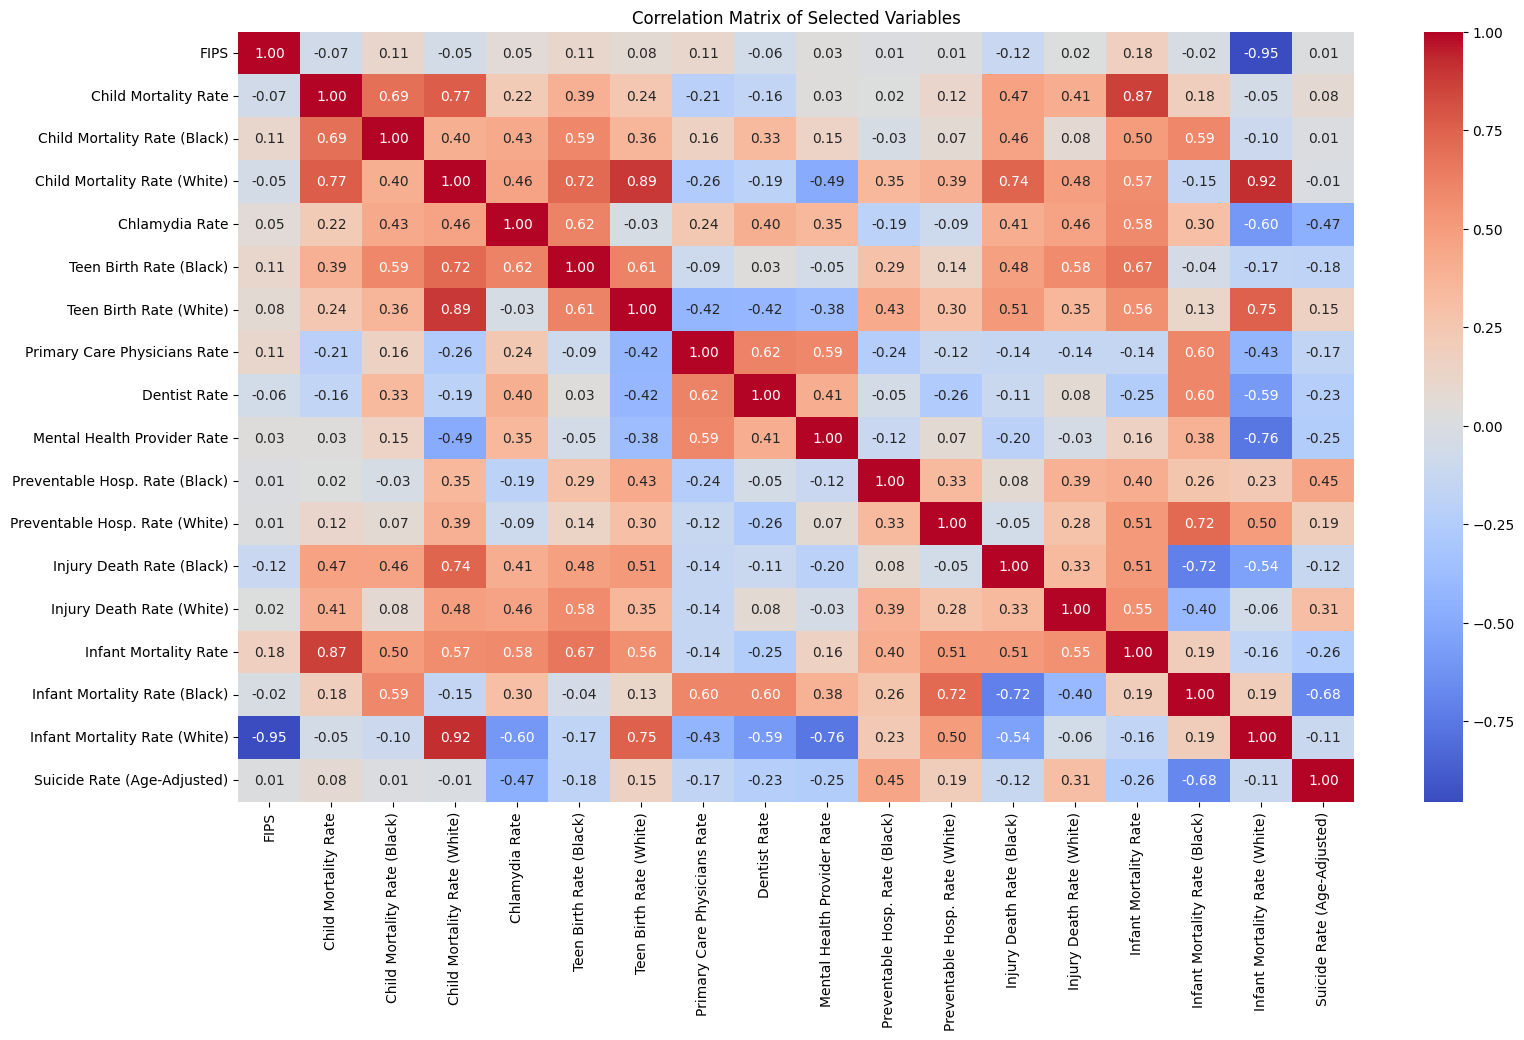

In [163]:
# correlation matrix for race specific  social-health behaviors
columns_correlation = ['FIPS', 'Child Mortality Rate', 'Child Mortality Rate (Black)', 'Child Mortality Rate (White)', 'Chlamydia Rate', 
                                 'Teen Birth Rate (Black)', 'Teen Birth Rate (White)', 'Primary Care Physicians Rate', 'Dentist Rate',
                                 'Mental Health Provider Rate', 'Preventable Hosp. Rate (Black)', 'Preventable Hosp. Rate (White)',
                                 'Injury Death Rate (Black)','Injury Death Rate (White)', 'Infant Mortality Rate', 
                      'Infant Mortality Rate (Black)', 'Infant Mortality Rate (White)', 'Suicide Rate (Age-Adjusted)']
df_correlation = df_selected_rate[columns_correlation]
correlation_matrix = df_correlation.corr()

# Visualize the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

In [172]:
df_selected_rate.columns

Index(['FIPS', 'Years of Potential Life Lost Rate', 'YPLL Rate (Black)',
       'YPLL Rate (White)', 'Chlamydia Rate', 'Teen Birth Rate',
       'Teen Birth Rate (Black)', 'Teen Birth Rate (White)',
       'Primary Care Physicians Rate', 'Dentist Rate',
       'Mental Health Provider Rate', 'Preventable Hospitalization Rate',
       'Preventable Hosp. Rate (Black)', 'Preventable Hosp. Rate (White)',
       'Social Association Rate', 'Injury Death Rate',
       'Injury Death Rate (Black)', 'Injury Death Rate (White)',
       'Age-Adjusted Death Rate', 'Child Mortality Rate',
       'Child Mortality Rate (Black)', 'Child Mortality Rate (White)',
       'Infant Mortality Rate', 'Infant Mortality Rate (Black)',
       'Infant Mortality Rate (White)', 'HIV Prevalence Rate',
       'Drug Overdose Mortality Rate', 'Drug Overdose Mortality Rate (Black)',
       'Drug Overdose Mortality Rate (White)',
       'Other Primary Care Provider Rate', 'High School Graduation Rate',
       'Homicide Rat

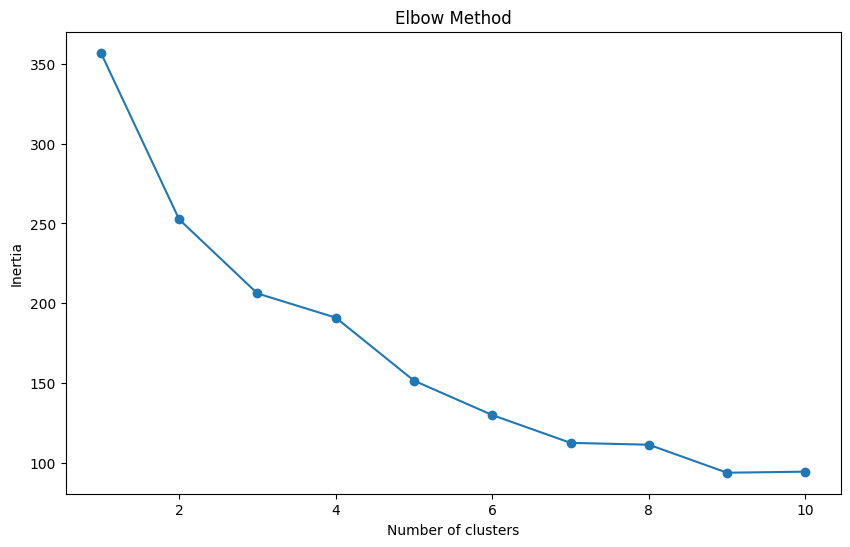

In [297]:
#columns_of_interest = [
#    'Child Mortality Rate', 'Median Household Income', 
#    '% Completed High School', '% Some College', '% Uninsured', '% Children in Poverty', 
#    'Population', '% Black', '% Hispanic', '% Non-Hispanic White', 
#    'Average Number of Physically Unhealthy Days', 'Average Number of Mentally Unhealthy Days'
#]

#columns_of_interest = [
#    'Child Mortality Rate', 'Child Mortality Rate (Black)', 'Child Mortality Rate (White)', 'Chlamydia Rate', 
#                                 'Teen Birth Rate (Black)', 'Teen Birth Rate (White)', 'Primary Care Physicians Rate', 'Dentist Rate',
#                                 'Mental Health Provider Rate', 'Preventable Hosp. Rate (Black)', 'Preventable Hosp. Rate (White)',
#                                 'Injury Death Rate (Black)','Injury Death Rate (White)','Suicide Rate (Age-Adjusted)'
#]
'''
columns_of_interest = ['Child Mortality Rate', 'Child Mortality Rate (Black)', 'Child Mortality Rate (White)',
                       '% Children in Single-Parent Households',
                                 '% Severe Housing Problems', 
                                 '% Uninsured Adults', '% Uninsured Children', '% Food Insecure',
                                 '% Limited Access to Healthy Foods', '% Disconnected Youth', '% Enrolled in Free or Reduced Lunch',
                      '% Household Income Required for Child Care Expenses', '% Voter Turnout', '% Census Participation',
                      '% Homeowners', '% Not Proficient in English', '% Female', '% Rural']


imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_cleaned[columns_of_interest])
# Convert imputed data back to DataFrame to retain column names
df_imputed = pd.DataFrame(df_imputed, columns=columns_of_interest, index=df_cleaned.index)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)
# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=columns_of_interest, index=df_cleaned.index)
'''

columns_of_interest = [
    'Child Mortality Rate', 
    '% Completed High School', '% Some College', '% Uninsured', '% Children in Poverty', 
    'Average Number of Physically Unhealthy Days', 'Average Number of Mentally Unhealthy Days'
]
df_selected = df_cleaned[columns_of_interest].dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [298]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_selected['Cluster'] = kmeans.fit_predict(df_scaled)
cluster_means = df_selected.groupby('Cluster').mean()

print(cluster_means)

         Child Mortality Rate  % Completed High School  % Some College  \
Cluster                                                                  
0                   62.000000                91.400000       62.000000   
1                   97.214286                81.214286       46.000000   
2                   63.000000                87.625000       59.500000   
3                   78.833333                86.875000       54.166667   

         % Uninsured  % Children in Poverty  \
Cluster                                       
0           8.200000              13.600000   
1          10.714286              29.642857   
2          11.375000              21.750000   
3           9.500000              26.375000   

         Average Number of Physically Unhealthy Days  \
Cluster                                                
0                                           3.660000   
1                                           4.621429   
2                                           3.95

In [299]:
df_selected['County'] = df_cleaned['County']
for i in range(optimal_k):  # 'k' is the number of clusters you chose
    print(f"Counties in Cluster {i}:")
    print(df_selected[df_selected['Cluster'] == i]['County'].head(), '\n')

Counties in Cluster 0:
4       Benton
23    Faulkner
27       Grant
43      Lonoke
63      Saline
Name: County, dtype: object 

Counties in Cluster 1:
6     Bradley
9      Chicot
11       Clay
19      Cross
33      Izard
Name: County, dtype: object 

Counties in Cluster 2:
5         Boone
8       Carroll
16    Craighead
17     Crawford
26      Garland
Name: County, dtype: object 

Counties in Cluster 3:
1     Arkansas
2       Ashley
12    Cleburne
14    Columbia
15      Conway
Name: County, dtype: object 



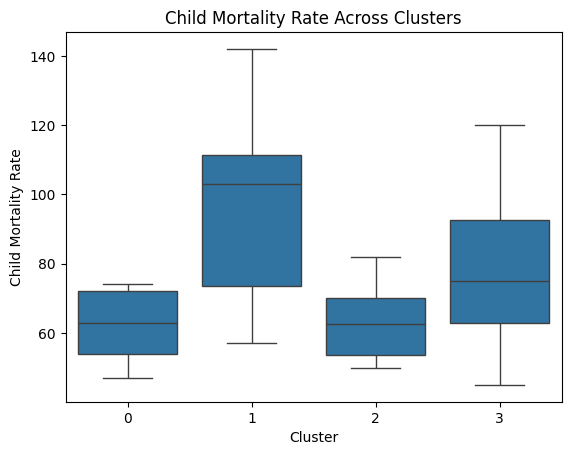

In [301]:
sns.boxplot(x='Cluster', y='Child Mortality Rate', data=df_selected)
plt.title('Child Mortality Rate Across Clusters')
plt.show()

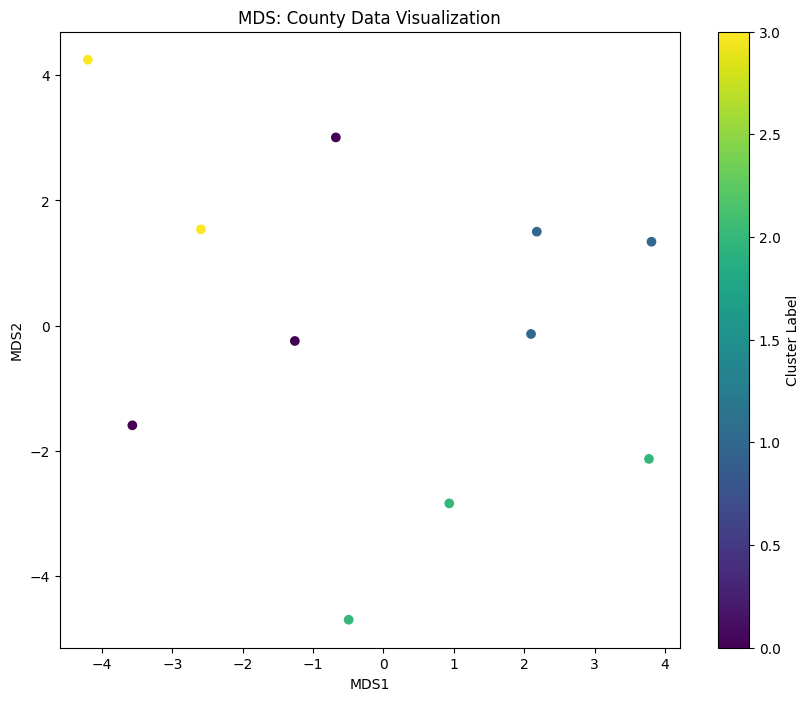

In [258]:
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_scaled is your scaled DataFrame ready for clustering
mds = MDS(n_components=2, random_state=42)
df_mds = mds.fit_transform(df_scaled)  # Transform your scaled data

plt.figure(figsize=(10, 8))
plt.scatter(df_mds[:, 0], df_mds[:, 1], c=kmeans.labels_, cmap='viridis')  # Assuming you've done KMeans clustering
plt.title('MDS: County Data Visualization')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
'''
# Scatter plots for variables with strong correlations to 'Child Mortality Rate'
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# % Children in Poverty vs. Child Mortality Rate
sns.scatterplot(ax=ax[0], data=df_selected, x='% Children in Poverty', y='Child Mortality Rate')
ax[0].set_title('% Children in Poverty vs. Child Mortality Rate')
ax[0].set_xlabel('% Children in Poverty')
ax[0].set_ylabel('Child Mortality Rate')

# % Black vs. Child Mortality Rate
sns.scatterplot(ax=ax[2], data=df_selected, x='% Black', y='Child Mortality Rate')
ax[2].set_title('% Black vs. Child Mortality Rate')
ax[2].set_xlabel('% Black')
ax[2].set_ylabel('Child Mortality Rate')

plt.tight_layout()
plt.show()
'''